In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [4]:
bank=pd.read_csv('D:\\ExcelR Assignments\\Logistic Regression\\bank-full.csv',sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank.shape

(45211, 17)

In [6]:
print(list(bank.columns))


['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [7]:
bank.drop(bank.columns[[0,3,8,9,10,11,12,13,15]],axis=1,inplace=True)
bank

,job,marital,default,balance,housing,loan,previous,y
0,management,married,no,2143,yes,no,0,no
1,technician,single,no,29,yes,no,0,no
2,entrepreneur,married,no,2,yes,yes,0,no
3,blue-collar,married,no,1506,yes,no,0,no
4,unknown,single,no,1,no,no,0,no
...,...,...,...,...,...,...,...,...
45206,technician,married,no,825,no,no,0,yes
45207,retired,divorced,no,1729,no,no,0,yes
45208,retired,married,no,5715,no,no,3,yes
45209,blue-collar,married,no,668,no,no,0,no


In [8]:
bank.isnull().sum()

job         0
marital     0
default     0
balance     0
housing     0
loan        0
previous    0
y           0
dtype: int64

In [9]:
bank['y']=bank['y'].map({'yes':1,'no':0})

In [10]:
bank.dtypes

job         object
marital     object
default     object
balance      int64
housing     object
loan        object
previous     int64
y            int64
dtype: object

In [11]:
bank=pd.get_dummies(bank,columns=['job','marital','default','housing','loan'])
bank

,balance,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,2143,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
1,29,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
2,2,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
3,1506,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
45207,1729,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
45208,5715,3,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
45209,668,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [12]:
first_column=bank.pop('y')
bank.insert(0,'y',first_column)

In [13]:
bank.columns

Index(['y', 'balance', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes'],
      dtype='object')

In [14]:
bank.drop(bank.columns[[14]],axis=1,inplace=True)
bank.columns

Index(['y', 'balance', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes'],
      dtype='object')

In [15]:
X=bank.iloc[:,1:23]
Y=bank.iloc[:,0]

In [16]:
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [17]:
classifier.coef_

array([[ 2.76120059e-05,  1.24669822e-01, -7.15082152e-02,
        -3.24141527e-01, -5.87222343e-02, -4.48185837e-02,
        -2.37868101e-02,  1.06768782e-01, -2.82157800e-02,
        -1.31796019e-01,  6.99521851e-02, -1.40958055e-01,
         5.54765650e-03, -1.33497284e-01, -4.81133577e-01,
        -3.23578075e-02, -5.74070081e-01, -7.29185877e-02,
         1.70965081e-01, -8.17953750e-01, -2.17671866e-01,
        -4.29316802e-01]])

In [18]:
classifier.intercept_

array([-0.64731939])

In [19]:
classifier.classes_

array([0, 1], dtype=int64)

In [20]:
classifier.predict_proba(X)

array([[0.93718948, 0.06281052],
       [0.91905159, 0.08094841],
       [0.95295489, 0.04704511],
       ...,
       [0.75225008, 0.24774992],
       [0.88644447, 0.11355553],
       [0.5877202 , 0.4122798 ]])

In [23]:
classifier.score(X,Y)

0.8818650328459888

In [24]:
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
y_pred_df=pd.DataFrame({'actual':Y,'predicted_prob':classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [28]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y,y_pred)
print(cm)

[[39840    82]
 [ 5259    30]]


In [29]:
((39840+30)/(39840+30+82+5259))*100

88.18650328459888

In [30]:
from sklearn.metrics import classification_report
print (classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.27      0.01      0.01      5289

    accuracy                           0.88     45211
   macro avg       0.58      0.50      0.47     45211
weighted avg       0.81      0.88      0.83     45211



0.5018090722171991


Text(0, 0.5, 'True Positive Rate')

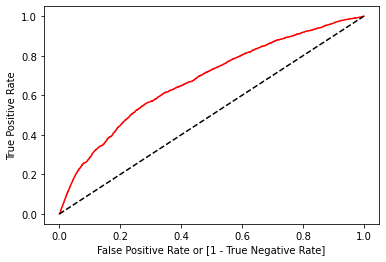

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [32]:
auc

0.5018090722171991